<a href="https://colab.research.google.com/github/onostosia/heheh/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google.colab

In [ ]:
pip install plotnine

In [ ]:
from google.colab import  files

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

In [ ]:
#files.upload() #загрузка файла с локального устройсва

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [ ]:
#!ls check file
#cd - change path to file

drive  sample_data  train.csv


In [ ]:
from google.colab import drive #как подключать файлы с gdisk?????
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/штуки на питоне/Titanic/Titanic data/train.csv')
print(train_data.head())
print(train_data.columns)
train_data.info()

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   

потери:
1. Embarked
2. Age
3. Сabine


> сделать чистку данных -> ??



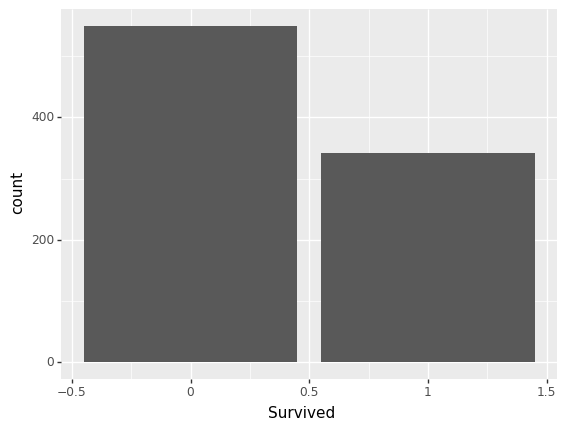

<ggplot: (8789955262798)>

In [ ]:
#@title Most people died
(ggplot(train_data)         # defining what data to use
 + aes(x='Survived')        # defining what variable to use
 + geom_bar(size=10)        # defining the type of plot to use
)

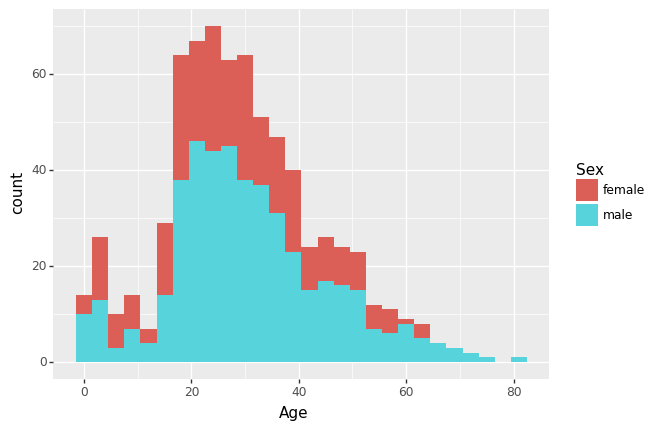

<ggplot: (8744986376982)>

In [ ]:
#@title people of 17-40 yo prevailed
(ggplot(train_data)         
 + aes(x='Age')             
 + geom_histogram(aes(fill = 'Sex'), binwidth = 3, size= 30)        
)

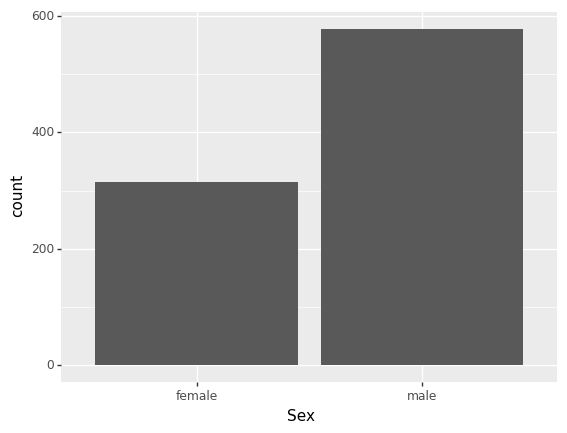

<ggplot: (-9223363291864510660)>

In [ ]:
#@title males prevailed (без ущемления чьих-либо прав) 
(ggplot(train_data)         
 + aes(x='Sex')
 + geom_bar(size=10)        
)

# g2 = (ggplot(train_data)         
#  + aes(x='Age')             
#  + geom_histogram(aes(fill = 'Sex'), binwidth = 3, size= 30)        
# )
# grid.arrange(g1, g2, ncol = 2, nrow=1)

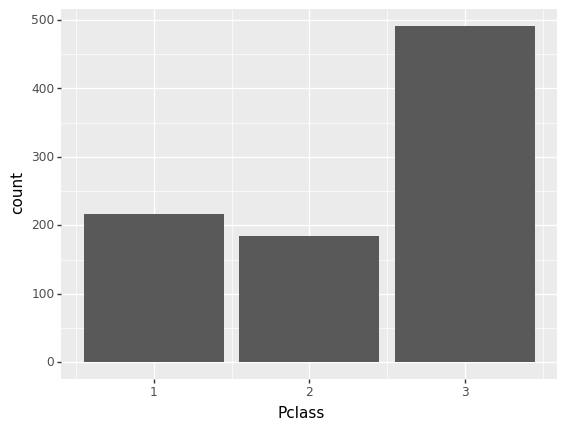

<ggplot: (-9223363291868396207)>

In [ ]:
#@title 3 class privailed
(ggplot(train_data)         
 + geom_bar(aes(x = 'Pclass', fill = 'Survived'))
 )        


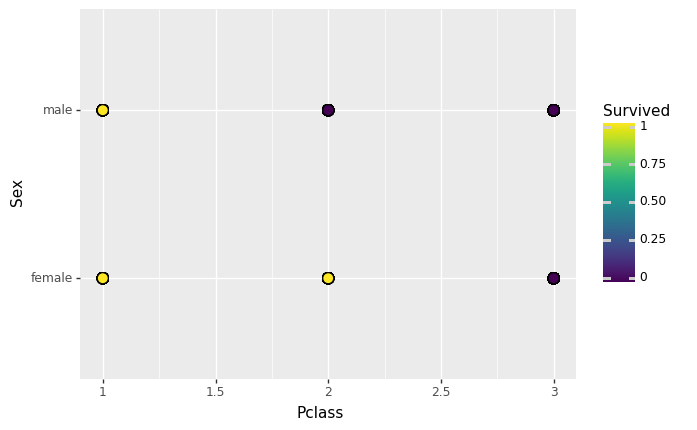

<ggplot: (-9223363291868721548)>

In [ ]:
#@title В основном выжили мужчины из 1 класса и женщины из 1-2
(ggplot(train_data)
       +aes(y = 'Sex', x = 'Pclass')
       +geom_point(aes(fill = 'Survived'),size = 4)
)


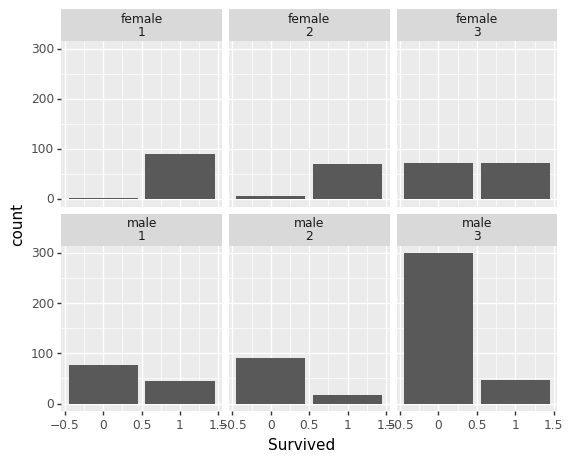

<ggplot: (8744985790279)>

In [ ]:
(ggplot(train_data) + aes(x='Survived') + 
    geom_bar() + 
    facet_wrap(['Sex', 'Pclass'])
)

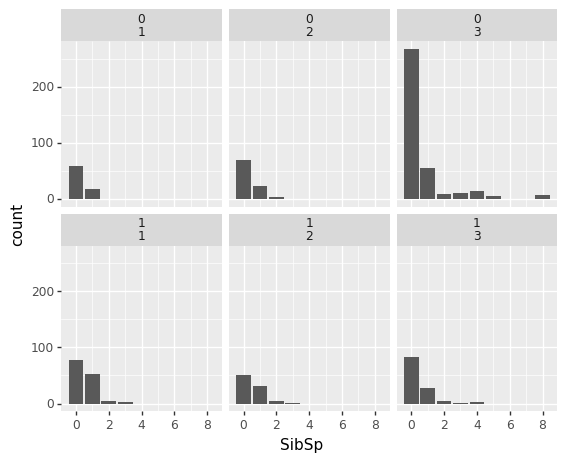

<ggplot: (8744984743176)>

In [ ]:
#@title родственники на борту помеха или нет?
#@markdown 1-2 класс + родственники = ок
#@markdown 3 класс + родственники = не ок
(ggplot(train_data) + aes(x='SibSp')
    +geom_bar()
    +facet_wrap(['Survived', 'Pclass'])
)

In [ ]:
#check statistic of survived
female = train_data.loc[train_data.Sex == 'female']["Survived"] #порядковый нормер и статус 
male = train_data.loc[train_data.Sex == 'male']["Survived"]


In [ ]:
#check statistic of survived
female = train_data.loc[train_data.Sex == 'female']["Survived"]
male = train_data.loc[train_data.Sex == 'male']["Survived"]

print(sum(female), len(female))
print (sum(male), len(male))

233 314
109 577


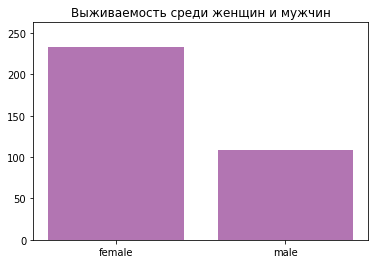

In [ ]:

height = [sum(female), sum(male)]
genders = ('female', 'male')
y_pos = np.arange(len(genders))

plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
plt.title('Выживаемость среди женщин и мужчин')
plt.ylim(0, max(height) + 30)
plt.xticks(y_pos, genders)
plt.show()

Что будет влиять на выживаемость?

1.   пол
2.   класс
3.   возраст??
4.   наличие родсвенников/ 

---
корреляции:
+ коэффициент ассоциации 


> 1 признак - Survived

> 2 признак - Sex

> 3 признак - Pclass


In [ ]:
import math
n2 = pd.DataFrame(train_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']])
print(n2)

n2 = n2.replace(math.nan,value=0)
for i in range(len(n2.Cabin)):
  if n2.Cabin[i] != 0:
    n2.Cabin[i] = 1
  
n2 = n2.replace('male',value=1)
n2 = n2.replace('female',value=2)     
n2 = n2.replace('S',value=1)
n2 = n2.replace('C',value=2) 
n2 = n2.replace('Q',value=3) 
print(n2)
#n2.loc(n2['Cabin'].isnull(), n2['Cabin']) = 0


     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0           0  

In [ ]:
#@title корреляция между признаками
#@markdown Survived -> Sex, Cabine, Fare, Embareked

n2_corr =n2.corr()
n2_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,0.010539,-0.035322,0.081629,0.257307,0.316912,0.101849
Pclass,-0.338481,1.000000,-0.131900,-0.361353,0.083081,0.018443,-0.549500,-0.725541,0.050992
Sex,0.543351,-0.131900,1.000000,-0.024978,0.114631,0.245489,0.182333,0.140391,0.111249
Age,0.010539,-0.361353,-0.024978,1.000000,-0.184664,-0.048786,0.135516,0.269360,-0.213632
SibSp,-0.035322,0.083081,0.114631,-0.184664,1.000000,0.414838,0.159651,-0.040460,-0.058008
Parch,0.081629,0.018443,0.245489,-0.048786,0.414838,1.000000,0.216225,0.036987,-0.076625
Fare,0.257307,-0.549500,0.182333,0.135516,0.159651,0.216225,1.000000,0.482075,0.058462
Cabin,0.316912,-0.725541,0.140391,0.269360,-0.040460,0.036987,0.482075,1.000000,0.007256
Embarked,0.101849,0.050992,0.111249,-0.213632,-0.058008,-0.076625,0.058462,0.007256,1.000000


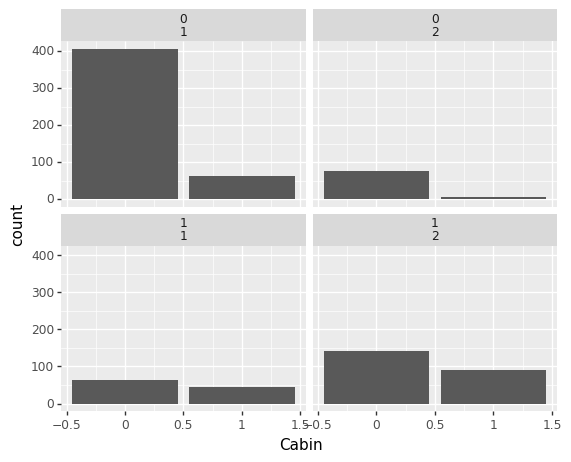

<ggplot: (-9223363281002792718)>

In [ ]:
(ggplot(n2) + aes(x='Cabin')
    +geom_bar()
    +facet_wrap(['Survived','Sex'])
)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

array = n2.values
X = array[:,1:9]  #разделение dataset [Pclass, Sex, .. ,Emb ]
Y = array[:, 0]   #[Survived]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True) # 80/20

model = SVC(gamma='auto',max_iter=2 )
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print('pred     set')
for i in range(len(Y_validation)):
  print(predictions[i], '    ', Y_validation[i])

pred     set
1.0      1.0
0.0      0.0
1.0      1.0
1.0      0.0
1.0      1.0
0.0      0.0
0.0      0.0
1.0      1.0
1.0      0.0
0.0      1.0
0.0      0.0
0.0      1.0
1.0      0.0
1.0      1.0
1.0      1.0
0.0      1.0
0.0      0.0
0.0      0.0
0.0      0.0
1.0      1.0
0.0      0.0
0.0      0.0
1.0      1.0
0.0      0.0
0.0      0.0
0.0      1.0
1.0      1.0
0.0      1.0
0.0      0.0
1.0      1.0
0.0      0.0
1.0      1.0
1.0      0.0
0.0      0.0
0.0      0.0
0.0      1.0
1.0      1.0
0.0      0.0
1.0      1.0
0.0      0.0
0.0      1.0
1.0      1.0
0.0      1.0
0.0      0.0
1.0      1.0
0.0      0.0
0.0      0.0
0.0      0.0
1.0      1.0
0.0      0.0
0.0      0.0
0.0      1.0
0.0      0.0
0.0      0.0
0.0      1.0
0.0      1.0
0.0      0.0
0.0      0.0
1.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
1.0      0.0
0.0      1.0
0.0      1.0
0.0      1.0
0.0      1.0
0.0      1.0
1.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
1.0      0.0
0.0      0.0
0.0      0.0
1.0      0.0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7597765363128491
[[90 16]
 [27 46]]
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       106
         1.0       0.74      0.63      0.68        73

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier

array2 = n2.values
X2 = array2[:,1:9]  #разделение dataset [Pclass, Sex, .. ,Emb ]
Y2 = array2[:, 0]   #[Survived]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(n2[features])
# X_test = pd.get_dummies(n2[features])

X_train2, X_validation2, Y_train2, Y_validation2 = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True) # 80/20

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train2, Y_train2)
predictions = model.predict(X_validation2)


In [ ]:
output = pd.DataFrame({'result': Y_validation2, 'pred': predictions})
#output.to_csv('my_submission.csv', index=False)
output
print(accuracy_score(Y_validation, predictions)

0.7597765363128491


In [ ]:
###########################################################################################################################################################################################################

In [ ]:
#new_train_data1 = new_train_data.merge(train_data[['Sex', 'Pclass']], how = 'inner')
new_train_data = pd.DataFrame(train_data[['Survived','Sex', 'Pclass','Age', 'SibSp', 'Cabin']])
new_train_data = new_train_data.replace('male',value=1)
new_train_data = new_train_data.replace('female',value=2)
  
#new_train_data.set_index(new_train_data.Age)
#new_train_data.dropna() #избавляемя от NaN в колонке Age

n1 = pd.pivot_table(new_train_data, columns = ['Sex'])
n1 

Sex,1,2
Age,30.726645,27.915709
Pclass,2.389948,2.159236
SibSp,0.429809,0.694268
Survived,0.188908,0.742038


In [ ]:
sur_correlation = new_train_data.corr()
sur_correlation

,Survived,Sex,Pclass,Age,SibSp
Survived,1.000000,0.543351,-0.338481,-0.077221,-0.035322
Sex,0.543351,1.000000,-0.131900,-0.093254,0.114631
Pclass,-0.338481,-0.131900,1.000000,-0.369226,0.083081
Age,-0.077221,-0.093254,-0.369226,1.000000,-0.308247
SibSp,-0.035322,0.114631,0.083081,-0.308247,1.000000


In [ ]:
# import numpy as np
# from scipy.stats import uniform as sp_rand
# from sklearn.linear_model import Ridge
# from sklearn.grid_search import RandomizedSearchCV
# # prepare a uniform distribution to sample for the alpha parameter
# param_grid = {'alpha': sp_rand()}
# # create and fit a ridge regression model, testing random alpha values
# model = Ridge()
# rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
# rsearch.fit(X, y)
# print(rsearch)
# # summarize the results of the random parameter search
# print(rsearch.best_score_)
# print(rsearch.best_estimator_.alpha)